## Final Project Submission

Please fill out:
* Student name: Evan Staffen
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Joseph Mata
* Blog post URL:


# Business Problem

The Johnson's recently had their first child. While they have loved living in New York City, they've decided that they would like a slower paced lifestyle and more space for their kid. I have been assigned to help them find a house that matches their needs, is affordable and in Kings County, Washington. I will be creating a predictive algorithm that can take in features of a house and return a sale price. 

# Imports

In [173]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
sns.set_style("whitegrid")


#  Kings County Housing Dataset

In [174]:
df = pd.read_csv('data/kc_house_data.csv')


# Exploratory Data Analysis

In [175]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

This dataset has 21 column and 21597 rows. Almost all of the columns are numeric values. Waterfront and yr_renovated seem to be the columns with the most missing values. The view column is missing 63 values.

In [177]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [178]:
df.duplicated().sum()

0

We do still have to deal with the missing values of the dataset, although we will get back to that when we are cleaning the dataset.



Looks like the columns pertaining to squarefeet seem to have extreme max values.
Clearly the maximum for bedrooms (33) is either an extreme outlier or an imputation error.
Another clear trend is that most houses were built before the 2000s.

In [179]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Outliers and Formatting

When dealing with such large numbers, the decimal places barely have any effect so I have rounded all the prices.

In [180]:
df['price'] = df['price'].round(0)

Clearly, a house does not have 33 bedrooms. 11 bedrooms also seems like an outlier so they will be dropped

In [181]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [182]:
df = df.loc[df['bedrooms']<10]

The sqft_basement column has question marks for values. I did consider imputing the question marks with zeros. Ultimately, I dropped these from our dataset, as a question mark does not seem to me like it is a clear indication that there is no basement in the house.

In [183]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       215
500.0       209
700.0       208
          ...  
3480.0        1
2730.0        1
2720.0        1
518.0         1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [184]:
df = df.loc[df['sqft_basement']!= '?']

Next I changed the date column to a datetime object and split it into years, months and days sold.

In [185]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year-2014
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

We will be splitting the grade column into two columns, a rating column and a condition column.

In [186]:
rating = df['grade'].str.split(" ",expand=True)
df['rating'] = rating[0].astype(int)
df['condition'] = rating[1]
df.loc[df['condition'] == 'Very', 'condition'] = 'Amazing'


It is fair to assume that the houses that do not have a view are also not on the waterfront, so we will input NO into the waterfront column if the view is NONE.

In [187]:
df.loc[df['view'] == 'NONE', 'waterfront'] = 'NO'
df['waterfront'].value_counts()

NO     20734
YES      142
Name: waterfront, dtype: int64

If the column yr_renovated is 0, I will replace that value with the year it was built. This was done to maintain as much data as possible and is definitely a fair assumption.

In [188]:
df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df['yr_built']
df.dropna(subset = ['yr_renovated'],inplace=True)
df['yr_renovated'] = df['yr_renovated'].astype(int)

df[['yr_renovated','yr_built']] = df[['yr_renovated','yr_built']]-1900

In [189]:
df['yr_renovated'].min()

0

Ultimately, these columns will not be helpful in our analysis so we will drop them.

In [190]:
df.drop(['date','day','grade','id','long','lat','year'],axis=1,inplace=True)


Multiple columns are not the proper datatype for our analysis. Bathrooms and floors should both be integers and all of the columns containing square feet should be changed to floats.

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17384 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17384 non-null  float64
 1   bedrooms       17384 non-null  int64  
 2   bathrooms      17384 non-null  float64
 3   sqft_living    17384 non-null  int64  
 4   sqft_lot       17384 non-null  int64  
 5   floors         17384 non-null  float64
 6   waterfront     17171 non-null  object 
 7   view           17335 non-null  object 
 8   condition      17384 non-null  object 
 9   sqft_above     17384 non-null  int64  
 10  sqft_basement  17384 non-null  object 
 11  yr_built       17384 non-null  int64  
 12  yr_renovated   17384 non-null  int64  
 13  zipcode        17384 non-null  int64  
 14  sqft_living15  17384 non-null  int64  
 15  sqft_lot15     17384 non-null  int64  
 16  month          17384 non-null  int64  
 17  rating         17384 non-null  int64  
dtypes: flo

In [192]:
df[['bathrooms','floors']]= df[['bathrooms','floors']].astype(int)
df[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15',
           'sqft_lot15']] = df[['sqft_living','sqft_lot','sqft_above','sqft_basement',
                        'sqft_living15','sqft_lot15']].astype(float)


# House Price Distribution


The first thing that I wanted to do was take out the extreme outliers from the housing price distribution. As housing prices are often skewed because of expensive mansions, I dropped all the outliers that seemed unreasonable to consider for this family.

In [193]:
df['price'].sort_values(ascending=True).tail(100)

246      2400000.0
4264     2400000.0
6189     2400000.0
1943     2400000.0
14499    2400000.0
           ...    
1313     5300000.0
1446     5350000.0
9245     6890000.0
3910     7060000.0
7245     7700000.0
Name: price, Length: 100, dtype: float64

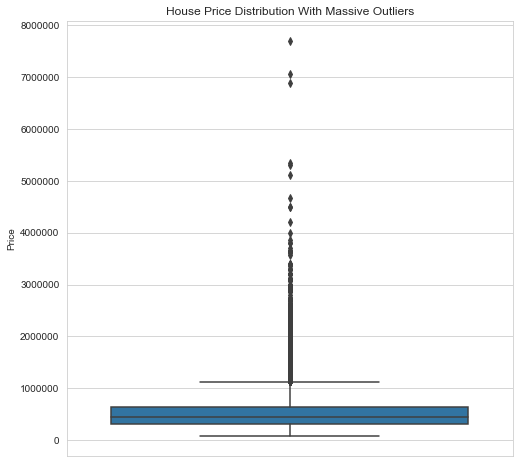

In [194]:
fig,ax = plt.subplots(figsize=(8,8))
ax = sns.boxplot(y = df['price']).set(ylabel='Price', title = 'House Price Distribution With Massive Outliers')
plt.ticklabel_format(style='plain', axis='y')
plt.show;

There are plenty of outliers on the more expensive end, which almost makes this graph unreadable. I am going to remove all houses that are above 2 million dollars for my analysis. When those houses are excluded, our box plot looks much more reasonable.

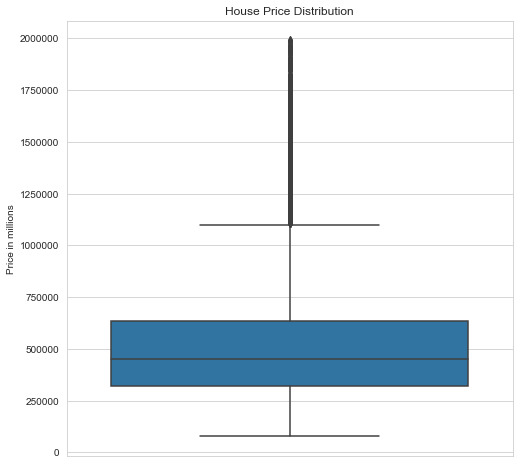

In [195]:
df = df.loc[df['price']<2000000]
fig,ax = plt.subplots(figsize = (8,8))
sns.boxplot(y = df['price']).set(ylabel='Price in millions', title = 'House Price Distribution')
plt.ticklabel_format(style='plain', axis='y')
plt.show;

Since the family wants to avoid the city life and find a house in the suburbs, I excluded all zip codes in Seattle from my analysis.

In [196]:
seattle = [98101,98102,98103, 98104,98105,98106, 98107, 98108, 98109, 98112, 98115, 98116, 
98117, 98118, 98119, 98121, 98122, 98125,98126,98133,98134,98136,98144,98154,98164,98174,98195,98199]
df = df.loc[-df['zipcode'].isin(seattle)]


Now that the data has been prepped, we can check one last time for any null values. I decided to drop the rows in waterfront and view that were still considered null.

In [197]:
df.isna().sum()

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront       126
view              31
condition          0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
sqft_living15      0
sqft_lot15         0
month              0
rating             0
dtype: int64

In [198]:
df.dropna(inplace=True)

# Inital Correlation and Heatmaps

The first correlation table and heatmap were used to figure out what variables are strongly correlated with price. For the correlation table I wanted to see any variables that had a correlation coefficient larger than 0.7

In [199]:
df.corr().abs() > .7

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month,rating
price,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,True,False,False,False,False,True,False,False,True
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False


''

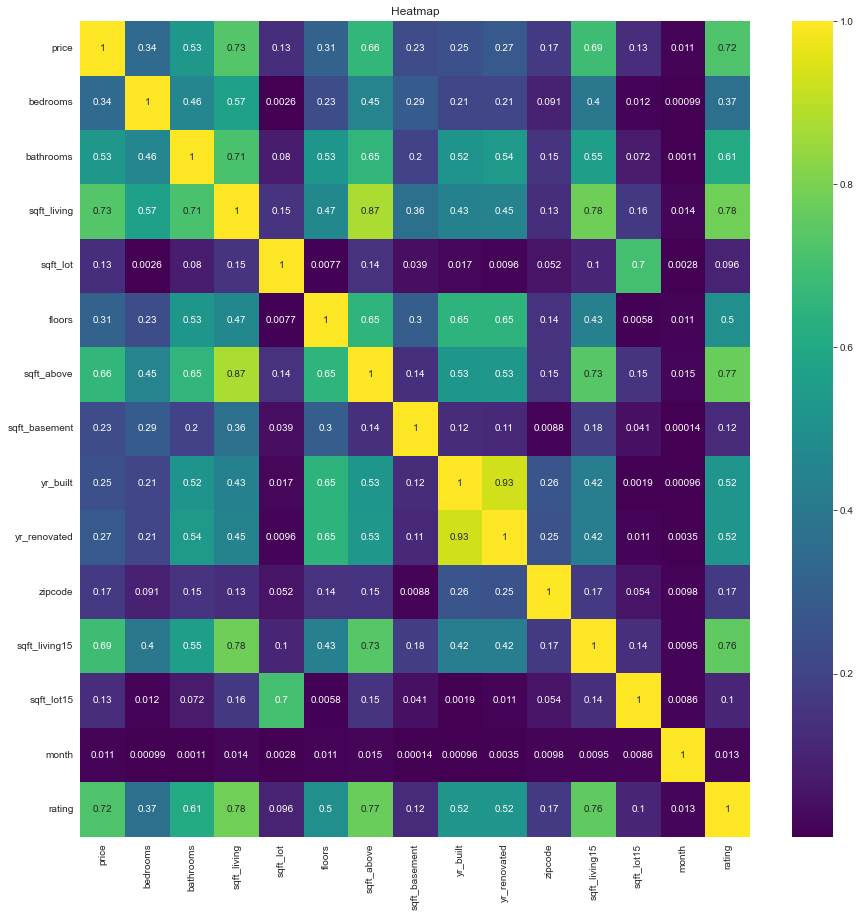

In [200]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr().abs(),annot=True,cmap="viridis").set(title='Heatmap')

;

While there are multiple columns that have strong correlation with price, sqft_living is definitely the most influential. Other variables like sqft_above, sqft_living15 and rating are all highly correlated as well, but it does make sense that sqft_living is the most important.

# Model 1

Since the column, sqft_living, has the highest correlation with sales price, I wanted to create my first model just taking this variable into account.


In [201]:
X = df[['sqft_living']]
y = df['price']

lr = LinearRegression()

model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.350e+04
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:43:16   Log-Likelihood:            -1.5986e+05
No. Observations:               11751   AIC:                         3.197e+05
Df Residuals:                   11749   BIC:                         3.197e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.438e+04   4831.799     -5.045      0.000   -3.38e+04   -1.49e+04
sqft_living   239.0693      2.057    116.208      0.000     235.037     243.102
==============================================================================
Omnibus:                     3610.012   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16522.639
Skew:                           1.432   Prob(JB):                         0.00
Kurtosis:                       8.055   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
lr.fit(X,y)
print(f"The correlation coefficient for this base model was {lr.score(X,y)}")

The correlation coefficient for this base model was 0.5347542299398474


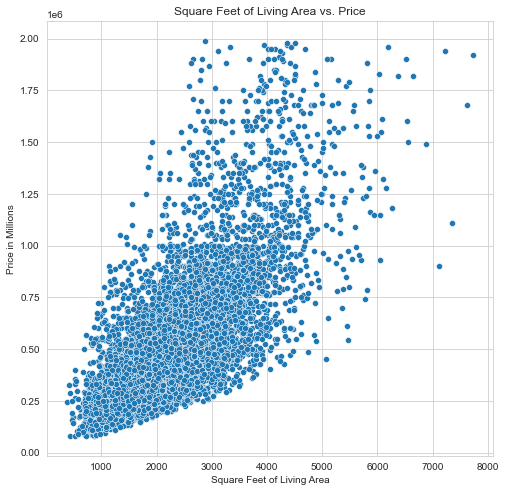

In [210]:
fig,ax =plt.subplots(figsize=(8,8))
sns.scatterplot(x=df['sqft_living'],y=df['price']).set(xlabel = 'Square Feet of Living Area', ylabel = 'Price in Millions',title ='Square Feet of Living Area vs. Price');

With such a low correlation coefficient and large condition number, it is clear that this model is not a good predictor of housing prices.

# MODEL 2

In my second model, I wanted to include every variable and see how that would affect the prediction, including the categorical variables. I split the variables between numerical, nominal and ordinal, and then ultimately joined them all together for analysis.

In [161]:
cond_list = ['Poor','Fair','Low','Average','Good','Better','Amazing','Excellent','Luxury', 'Mansion']
view_list = ['NONE','FAIR','AVERAGE','GOOD','EXCELLENT']

In [162]:
ohe = OneHotEncoder(drop='first',sparse = False)
ss = StandardScaler()
o_enc = OrdinalEncoder(categories = [cond_list, view_list])
lr = LinearRegression()

#Define X and y variables
X = df.drop(['price'],axis=1)
y = df['price']

#Train, test, split, here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#NUMERICAL
Xtrain_numerical = X_train.drop(['waterfront','view','condition'], axis=1)
Xtest_numerical = X_test.drop(['waterfront','view','condition'], axis=1)


Xtrain_numerical_scaled = pd.DataFrame(ss.fit_transform(Xtrain_numerical),
                              columns=Xtrain_numerical.columns,
                              index=Xtrain_numerical.index)
Xtest_numerical_scaled = pd.DataFrame(ss.transform(Xtest_numerical),columns=Xtest_numerical.columns,
                              index=Xtest_numerical.index)
#NOMINAL
Xtrain_nom = pd.DataFrame(X_train['waterfront'])
Xtest_nom = pd.DataFrame(X_test['waterfront'])

Xtrain_nom = pd.DataFrame(ohe.fit_transform(Xtrain_nom),columns=Xtrain_nom.columns,index=Xtrain_nom.index)
Xtest_nom = pd.DataFrame(ohe.transform(Xtest_nom),columns=Xtest_nom.columns,index=Xtest_nom.index)

#ORDINAL
ord_cat = ['condition', 'view']
Xtrain_ord = X_train[ord_cat]
Xtest_ord = X_test[ord_cat]

Xtrain_ord= pd.DataFrame(o_enc.fit_transform(Xtrain_ord),columns=Xtrain_ord.columns,index=Xtrain_ord.index)
Xtest_ord = pd.DataFrame(o_enc.transform(Xtest_ord),columns=Xtest_ord.columns,index=Xtest_ord.index)

#concat
Xtrain_processed = pd.concat([Xtrain_nom,Xtrain_numerical,Xtrain_ord], axis=1)
Xtest_processed = pd.concat([Xtest_nom,Xtest_numerical,Xtest_ord], axis=1)


In [163]:
model = sm.OLS(endog=y_train, exog=sm.add_constant(Xtrain_processed)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     964.6
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:02:00   Log-Likelihood:            -1.0586e+05
No. Observations:                7873   AIC:                         2.118e+05
Df Residuals:                    7856   BIC:                         2.119e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.324e+07   3.77e+06     14.111      0.000    4.58e+07    6.06e+07
waterfront     2.752e+05   2.64e+04     10.428      0.000    2.23e+05    3.27e+05
bedrooms      -1.671e+04   2905.060     -5.752      0.000   -2.24e+04    -1.1e+04
bathrooms      3.261e+04   4351.691      7.494      0.000    2.41e+04    4.11e+04
sqft_living      69.7713      3.239     21.539      0.000      63.421      76.121
sqft_lot          0.1068      0.065      1.652      0.099      -0.020       0.233
floors        -2.566e+04   6019.572     -4.262      0.000   -3.75e+04   -1.39e+04
sqft_above       48.7017      3.141     15.506      0.000      42.545      54.859
sqft_basement    21.1141      3.607      5.854      0.000      14.044      28.185
yr_built      -3214.4116    248.122    -12.955      0.000   -3700.797   -2728.026
yr_renovated    711.6603    253.677      2.805      0.005     214.386    1208.935
zipcode        -542.9841     38.462    -14.117      0.000    -618.380    -467.588
sqft_living15    70.1844      4.789     14.655      0.000      60.796      79.573
sqft_lot15       -0.2698      0.090     -3.014      0.003      -0.445      -0.094
month         -2615.1127    601.609     -4.347      0.000   -3794.426   -1435.800
rating         1301.4573   2.67e+04      0.049      0.961    -5.1e+04    5.36e+04
condition       9.01e+04   2.69e+04      3.351      0.001    3.74e+04    1.43e+05
view           4.628e+04   3318.536     13.946      0.000    3.98e+04    5.28e+04
==============================================================================
Omnibus:                     1980.264   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9422.940
Skew:                           1.140   Prob(JB):                         0.00
Kurtosis:                       7.851   Cond. No.                     3.02e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.04e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [164]:
lr.fit(Xtrain_processed,y_train)
y_hat = lr.predict(Xtest_processed)

print(f"The correlation coefficient for the second model was: {lr.score(Xtrain_processed, y_train)}")
print(f"The correlation coefficient for the test data on second model was: {lr.score(Xtest_processed, y_test)}")
print(f"The mean absolute error for the second model was: {mean_absolute_error(y_test, y_hat)}")
print(f"The mean squared error for the second model was: {mean_squared_error(y_test, y_hat,squared=False)}")

The correlation coefficient for the second model was: 0.6626762317509722
The correlation coefficient for the test data on second model was: 0.6681164702094664
The mean absolute error for the second model was: 116395.58976807592
The mean squared error for the second model was: 164150.5006941399


''

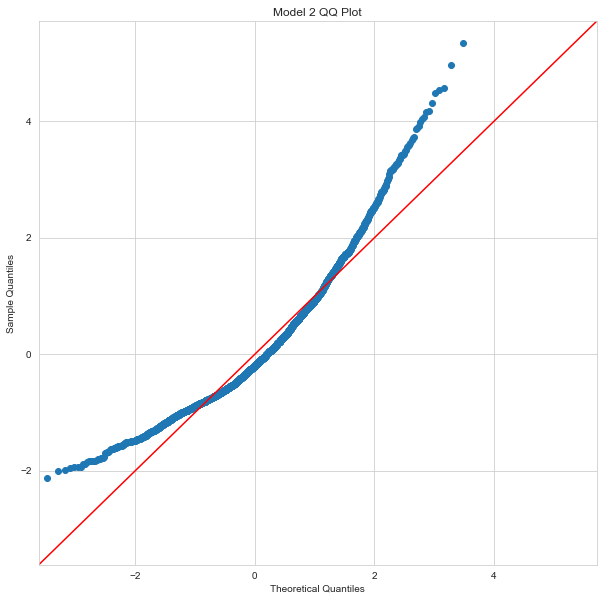

In [167]:
y_hat = lr.predict(Xtest_processed)
fig,ax=plt.subplots(figsize=(10,10))
sm.graphics.qqplot(y_hat, dist=stats.norm, line='45', fit=True, ax =ax)
plt.title('Model 2 QQ Plot')
;

''

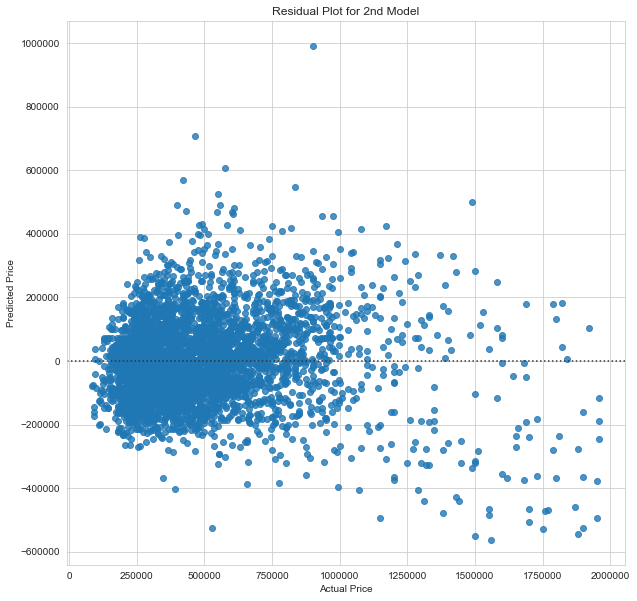

In [116]:
fig,ax=plt.subplots(figsize=(10,10))
sns.residplot(x=y_test,y=y_hat).set(title = 'Residual Plot for 2nd Model',xlabel = 'Actual Price',ylabel='Predicted Price')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

;

Even though the correlation coefficient did increase, we are clearly still having significant errors. The model seems to decent at predicting houses in the mid-range of prices, but not well for cheap and expensive houses.

# MODEL 3

In my third model, I wanted to see if taking into account the zipcode would have any affect on our prediction for price.

In [118]:
lr = LinearRegression()
ohezip_train = ohe.fit_transform(Xtrain_processed[['zipcode']])
ohezip_test = ohe.transform(Xtest_processed[['zipcode']])

ohe_train = pd.DataFrame(ohezip_train, columns = ohe.get_feature_names_out())
ohe_test = pd.DataFrame(ohezip_test, columns = ohe.get_feature_names_out())

ohe_train.reset_index(inplace= True)
ohe_test.reset_index(inplace=True)

Xtrain_processed.reset_index(inplace=True)
Xtest_processed.reset_index(inplace= True)


final_x_train = pd.concat([Xtrain_processed, ohe_train], axis =1)
final_x_test = pd.concat([Xtest_processed, ohe_test], axis =1)

final_x_train.drop('zipcode', axis =1, inplace = True)
final_x_test.drop('zipcode', axis =1, inplace = True)

In [119]:
final_x_train.columns

Index(['index', 'waterfront', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15', 'month', 'rating',
       'condition', 'view', 'index', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092'

In [120]:
lr.fit(final_x_train, y_train)
y_hat = lr.predict(final_x_test)

print(f"The correlation coefficient for the third model was: {lr.score(final_x_train,y_train)}")
print(f"The correlation coefficient for the test data on third model was: {lr.score(final_x_test, y_test)}")
print(f"The mean absolute error for the third model was: {mean_absolute_error(y_test, y_hat)}")
print(f"The mean squared error for the third model was: {mean_squared_error(y_test, y_hat,squared=False)}")

The correlation coefficient for the third model was: 0.8678223911830577
The correlation coefficient for the test data on third model was: 0.8666118102172106
The mean absolute error for the third model was: 69883.59443422443
The mean squared error for the third model was: 104065.80568622924


Text(0.5, 1.0, 'Third Model QQ Plot')

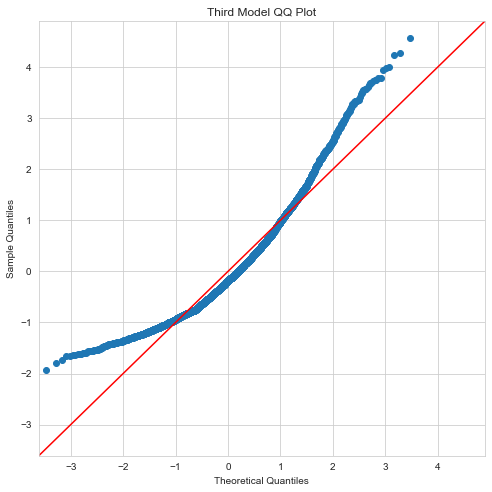

In [121]:
fig,ax=plt.subplots(figsize=(8,8))
sm.graphics.qqplot(y_hat, dist=stats.norm, line='45', fit=True,ax=ax)
plt.title('Third Model QQ Plot')

We definitely see some improvement in this model, as the errors have decreased and the correlation coefficient has increased.

# MODEL 4

In this model, I wanted to look at the distribution of price to make sure that we haven't been violating any assumptions of normality.

''

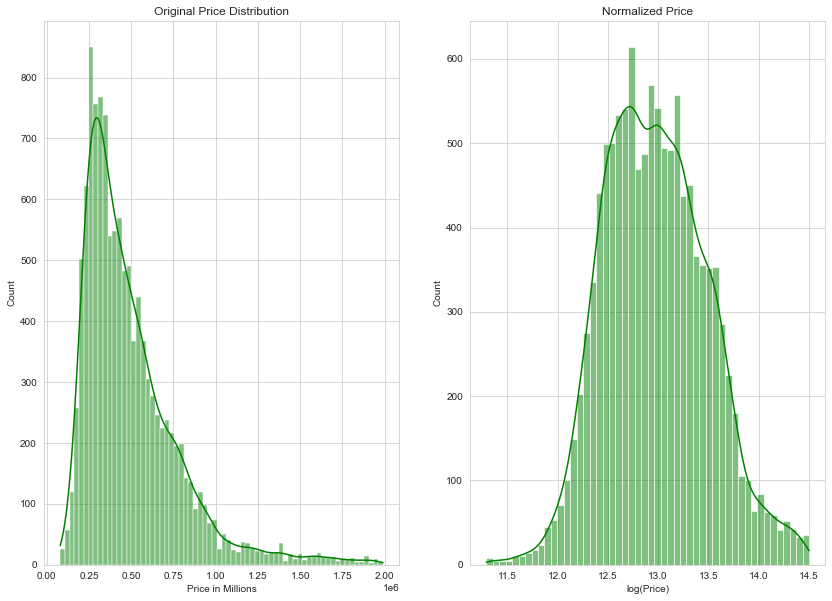

In [122]:
fig,ax =plt.subplots(nrows = 1, ncols=2,figsize=(14,10))
sns.histplot(df['price'],kde=True, color="green",ax=ax[0]).set(title = 'Original Price Distribution',xlabel = 'Price in Millions')
sns.histplot(np.log(df['price']),kde=True, color="green",ax=ax[1]).set(title='Normalized Price',xlabel = 'log(Price)')
plt.ticklabel_format(style='plain', axis='x')
;

With this right skew in the price column, a log transformation (as seen in the graph on the right) works very well to normalize the price.

In [123]:
ohe = OneHotEncoder()

ohezip_train = ohe.fit_transform(Xtrain_processed[['zipcode']])
ohezip_test = ohe.transform(Xtest_processed[['zipcode']])

ohe_train = pd.DataFrame(ohezip_train.todense(), columns = ohe.get_feature_names_out())
ohe_test = pd.DataFrame(ohezip_test.todense(), columns = ohe.get_feature_names_out())

ohe_train.reset_index(inplace= True)
ohe_test.reset_index(inplace=True)

final_x_train = pd.concat([Xtrain_processed, ohe_train], axis =1)
final_x_test = pd.concat([Xtest_processed, ohe_test], axis =1)

final_x_train.drop('zipcode', axis =1, inplace = True)
final_x_test.drop('zipcode', axis =1, inplace = True)

lr = LinearRegression()

lr.fit(final_x_train, np.log(y_train))

lr.score(final_x_train,np.log(y_train))
y_hat = np.exp(lr.predict(final_x_test))


In [124]:
print(f"The correlation coefficient for the fourth model was: {lr.score(final_x_train,np.log(y_train))}")
print(f"The correlation coefficient for the test data on fourth model was: {lr.score(final_x_test, np.log(y_test))}")
print(f"The mean absolute error for the fourth model was: {mean_absolute_error(y_test, y_hat)}")
print(f"The mean squared error for the fourth model was: {mean_squared_error(y_test, y_hat,squared=False)}")

The correlation coefficient for the fourth model was: 0.8888044126933539
The correlation coefficient for the test data on fourth model was: 0.8830716922328822
The mean absolute error for the fourth model was: 61646.16336068811
The mean squared error for the fourth model was: 107207.96042693054


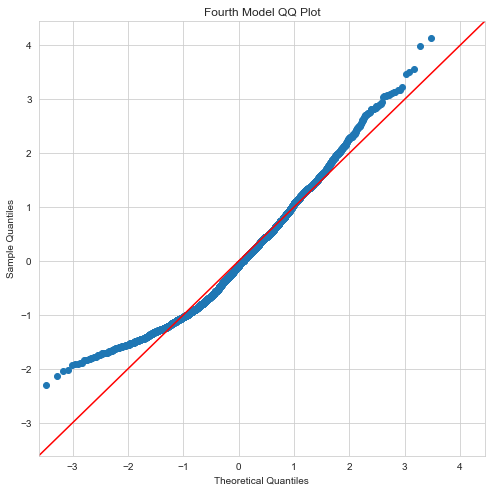

In [125]:
fig,ax=plt.subplots(figsize=(8,8))
sm.graphics.qqplot(np.log(y_hat), dist=stats.norm, line='45', fit=True,ax=ax)
plt.title('Fourth Model QQ Plot');

Normalizing the price with a log transformation definitely has improved the model a lot

# MODEL 5

In this last model, I tried to get rid of as many of the squarefoot columns as possible. These columns are all inherently correlated with each other and could be adding error into our predictions.

In [126]:
final_x_train5 = final_x_train.drop(['sqft_above','sqft_lot15','sqft_basement','yr_renovated','rating','sqft_living15','month','index'],axis=1)
final_x_test5 = final_x_test.drop(['sqft_above','sqft_lot15','sqft_basement','yr_renovated','rating','sqft_living15','month','index'],axis=1)

lr = LinearRegression()

lr.fit(final_x_train5, np.log(y_train))

lr.score(final_x_train5,np.log(y_train))
y_hat = np.exp(lr.predict(final_x_test5))


In [127]:
print(f"The correlation coefficient for the fifth model was: {lr.score(final_x_train5,np.log(y_train))}")
print(f"The correlation coefficient for the test data on the fifth model was: {lr.score(final_x_test5, np.log(y_test))}")

print(f"The mean absolute error for the fifth model was: {mean_absolute_error(y_test, y_hat)}")
print(f"The mean squared error for the fifth model was: {mean_squared_error(y_test, y_hat,squared=False)}")

The correlation coefficient for the fifth model was: 0.8824826853518081
The correlation coefficient for the test data on the fifth model was: 0.8774401127677905
The mean absolute error for the fifth model was: 63776.510712902564
The mean squared error for the fifth model was: 113147.92005458362


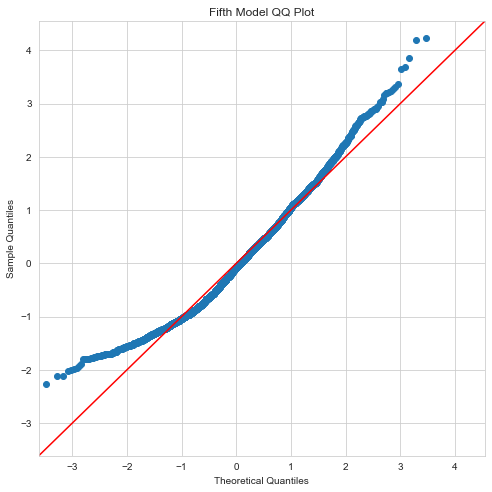

In [128]:
fig,ax = plt.subplots(figsize=(8,8))
sm.graphics.qqplot(np.log(y_hat), dist=stats.norm, line='45', fit=True, ax=ax)
plt.title('Fifth Model QQ Plot');

''

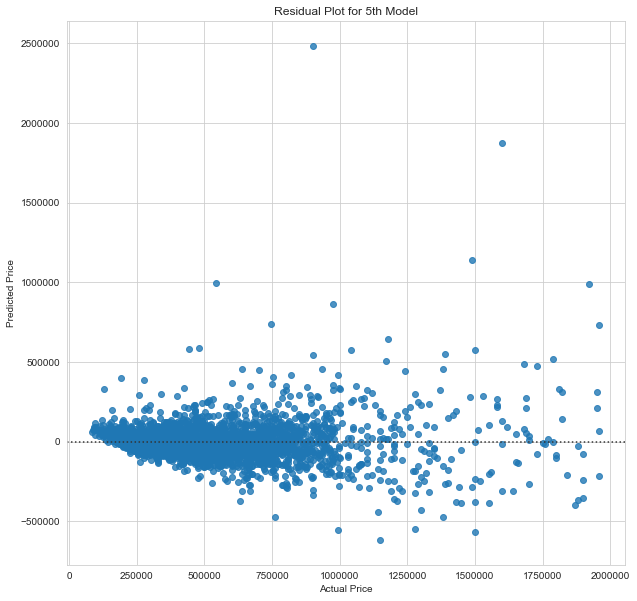

In [129]:
fig,ax =plt.subplots(nrows = 1, ncols=1,figsize=(10,10))
sns.residplot(x=y_test,y=y_hat).set(title = 'Residual Plot for 5th Model',xlabel = 'Actual Price',ylabel='Predicted Price')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

;

In [49]:
final_x_train5

,waterfront,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition,view,zipcode_98001,...,zipcode_98092,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198
0,0.0,5,2,3040.0,8111.0,2,84,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,4,3,2260.0,30250.0,2,113,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1,2,1150.0,9812.0,1,62,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,4,1,1980.0,7015.0,1,73,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,4,2,2810.0,10300.0,1,78,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7868,0.0,4,2,2330.0,3920.0,2,105,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7869,0.0,3,1,1630.0,22764.0,1,70,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7870,0.0,5,2,2900.0,6650.0,1,64,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7871,0.0,4,2,2540.0,28563.0,1,84,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


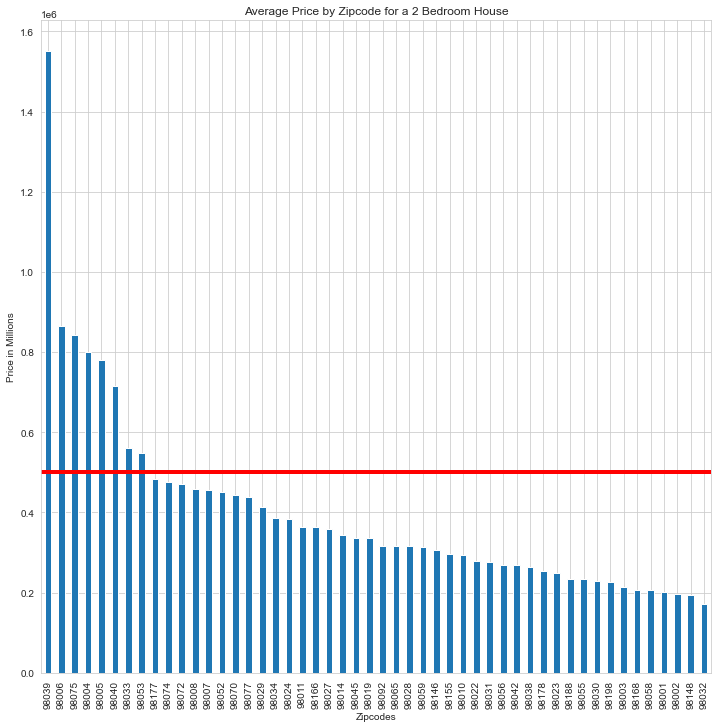

In [172]:
fig, ax = plt.subplots(figsize=(12,12))
two_beds = df.loc[df['bedrooms']==2]
two_beds.groupby('zipcode')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ticklabel_format(style='sci', axis='y')
plt.ylabel('Price in Millions')
plt.xlabel('Zipcodes')
plt.title('Average Price by Zipcode for a 2 Bedroom House')
plt.axhline(y=500000,color='r',linewidth=4)
plt.show;